In [25]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import geopandas as gpd
import seaborn as sns
from HierarchicalGeoClustering import TreeClusters, Clustering 
import shapely 
from matplotlib import cm
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [26]:
df_twitter_geo_cut = pd.read_csv('../data/data-1591295328886_cdmx.csv')

In [27]:
df_twitter_geo_cut= df_twitter_geo_cut.drop_duplicates(subset = ['x', 'y'])

In [62]:
df_twi_geo_cut_cdmx=  df_twitter_geo_cut.sample(20000)

In [29]:
data_load= df_twi_geo_cut_cdmx[['x','y']]

In [30]:
data_load= data_load.drop_duplicates(subset = ['x', 'y'])

In [31]:
orig_min_x =data_load['x'].min()
orig_max_x =data_load['x'].max()
orig_min_y =data_load['y'].min()
orig_max_y =data_load['y'].max()

In [32]:
data_load['x_trans'] = (data_load['x']- orig_min_x)/(orig_max_x- orig_min_x)
data_load['y_trans'] = (data_load['y']- orig_min_y)/(orig_max_y- orig_min_y)

In [33]:
data_load.head()

,x,y,x_trans,y_trans
1539042,-99.220020,19.304293,0.325434,0.429592
493149,-99.188672,19.390087,0.406528,0.610456
2929722,-99.224064,19.278709,0.314972,0.375658
1931590,-99.146916,19.418522,0.514546,0.670400
1297137,-99.111320,19.416427,0.606629,0.665984


In [34]:
data_arr= data_load[['x_trans', 'y_trans']].to_numpy()

In [35]:
data_arr

array([[0.32543382, 0.42959206],
       [0.40652777, 0.61045584],
       [0.31497242, 0.375658  ],
       ...,
       [0.4305626 , 0.40353363],
       [0.37226695, 0.57775473],
       [0.34412154, 0.75045799]])

In [36]:
data_arr.shape

(50000, 2)

In [37]:
dic_points={'points':[data_arr], 'parent':''}

In [38]:
levels_cluster=3
tree_Natural_c = Clustering.recursive_clustering_tree(
                        dic_points,
                        levels_clustering = levels_cluster,
                        algorithm = 'natural_cities'
                )

In [39]:

tree_DBSCAN = Clustering.recursive_clustering_tree(
                        dic_points,
                        levels_clustering = levels_cluster,
                        algorithm = 'dbscan'
                )

In [40]:

tree_HDBSCAN = Clustering.recursive_clustering_tree(
                        dic_points,
                        levels_clustering = levels_cluster,
                        algorithm = 'hdbscan'
                )

In [41]:
tree_OPTICS= Clustering.recursive_clustering_tree(
                        dic_points,
                        levels_clustering = levels_cluster,
                        algorithm = 'optics'
                )

In [42]:
tree_knee = Clustering.recursive_clustering_tree(
                    dic_points,
                    levels_clustering = levels_cluster,
                    algorithm = 'adaptative_DBSCAN'
                )

In [43]:
tree_knee.levels

0

(-0.05, 1.05, -0.05, 1.05)

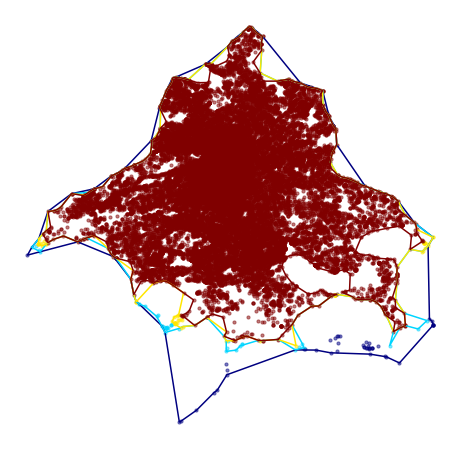

In [44]:
fig, axs = plt.subplots( figsize=(8,8))
tree_knee.visualize(axs, size_cluster=10 , polygon=True)
axs.axis('off')


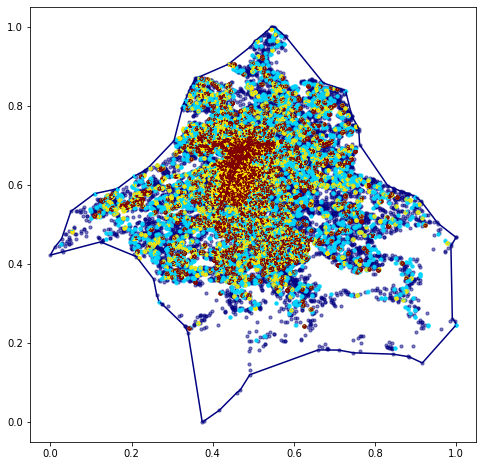

In [45]:
fig, axs = plt.subplots( figsize=(8,8))
tree_Natural_c.visualize(axs, size_cluster=10 , polygon=True)
axs.axis('off')

(-0.022177569561566524,
 1.0486751223600745,
 0.14762257118583824,
 1.0357351108974886)

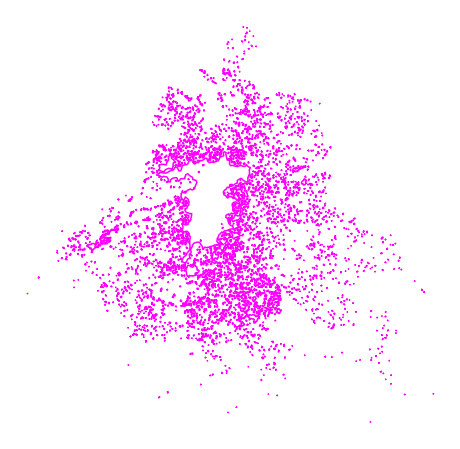

In [57]:
fig, axs = plt.subplots( figsize=(8,8))
for cluster in tree_Natural_c.get_level(1):
    cluster.viewer_cluster(axs, color_cluster='white', polygon=True )
# tree_Natural_c.visualize_levels(axs, levels=[1],polygon=True)
axs.axis('off')

(0.06768646330231079,
 0.9642073498825533,
 0.20399698960909418,
 0.9573983307930489)

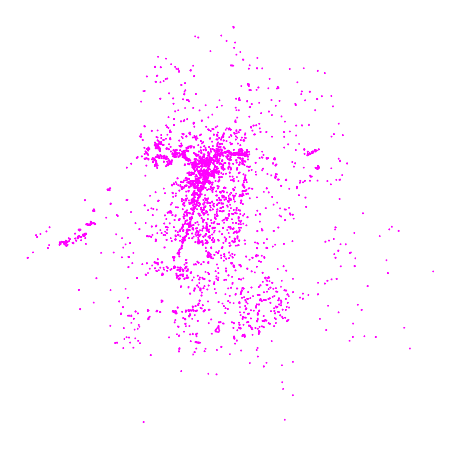

In [59]:
fig, axs = plt.subplots( figsize=(8,8))
for cluster in tree_Natural_c.get_level(3):
    cluster.viewer_cluster(axs, color_cluster='white', polygon=True )
# tree_Natural_c.visualize_levels(axs, levels=[1],polygon=True)
axs.axis('off')

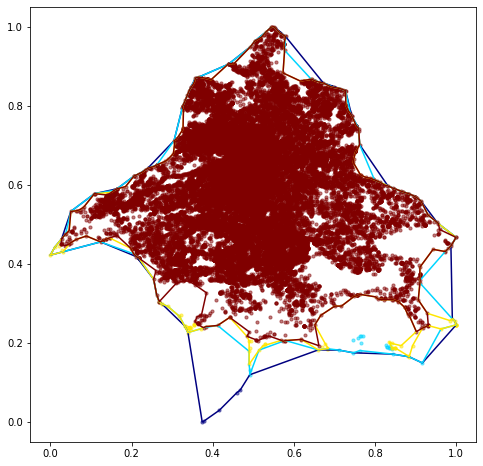

In [46]:
fig, axs = plt.subplots( figsize=(8,8))
tree_DBSCAN.visualize(axs, size_cluster=10 , polygon=True)
axs.axis('off')

(-0.05, 1.05, -0.05, 1.05)

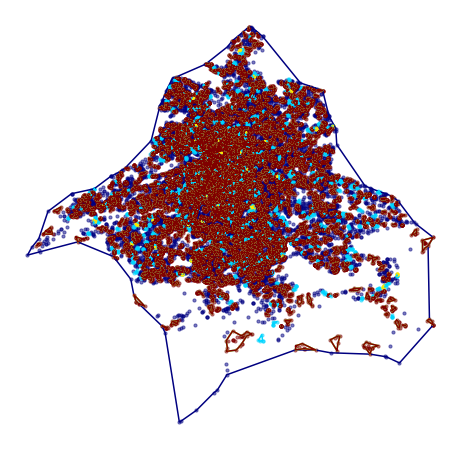

In [47]:
fig, axs = plt.subplots( figsize=(8,8))
tree_OPTICS.visualize(axs, size_cluster=10 , polygon=True)
axs.axis('off')

(-0.027061366293823857,
 1.0489076841092297,
 0.1304053697953252,
 1.0405059902141187)

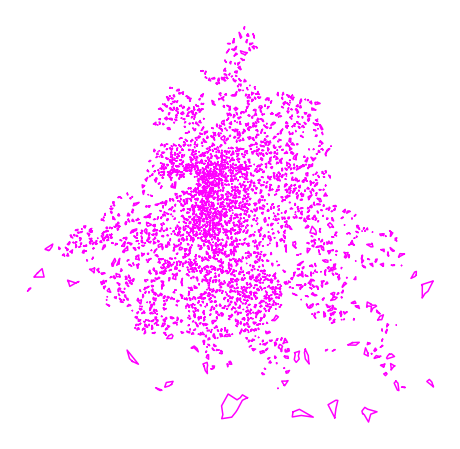

In [61]:
fig, axs = plt.subplots( figsize=(8,8))
for cluster in tree_OPTICS.get_level(2):
    cluster.viewer_cluster(axs, color_cluster='white', polygon=True )
# tree_Natural_c.visualize_levels(axs, levels=[1],polygon=True)
axs.axis('off')

(-0.05, 1.05, -0.05, 1.05)

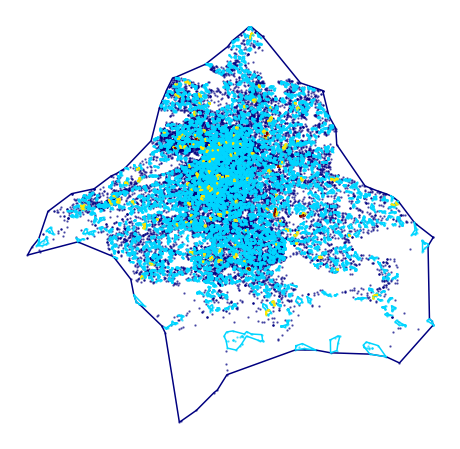

In [53]:
fig, axs = plt.subplots( figsize=(8,8))
tree_HDBSCAN.visualize(axs, size_cluster=2 , polygon=True)
axs.axis('off')